In [2]:
import sys
sys.path.append('/home/timur/garbage/venv/lib/python3.8/site-packages')
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import plotly.express as px
import plotly.figure_factory as ff
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
from scipy.stats import norm
from scipy.stats import pearsonr

## Task 1

In [116]:
def cont_comp_returns(sol):
    return (np.diff(sol) / sol[:-1])


def Exp_Short(arr, alfa):

    step = 0.0001
    x = 0.0001
    res = 0

    while x <= alfa:
        var = np.quantile(arr, 1 - x)
        res += step * var
        x+= step
    return (-1/alfa) * res


def Exp_Short_Norm(alfa, mean_ccr, var_ccr):
    step = 0.0001
    x = 0.0001
    res = 0

    while x <= alfa:
        var = norm.ppf(1 - x, loc = mean_ccr, scale = var_ccr)
        res += var * step
        x += step
    return (-1/alfa) * res


def comp_analisys(ticker):
    yahoo_financials = YahooFinancials(ticker)
    data = yahoo_financials.get_historical_price_data(start_date='1999-12-31',
                                                      end_date='2021-12-31',
                                                      time_interval='daily')
    comp_df = pd.DataFrame(data[ticker]['prices'])
    comp_ccr = cont_comp_returns(comp_df['close']).dropna()
    comp_ccr_win = comp_ccr[comp_ccr < 0.04]
    mean_ccr = np.mean(comp_ccr)
    var_ccr = np.std(comp_ccr)
    mean_ccr_win = np.mean(comp_ccr_win)
    var_ccr_win = np.std(comp_ccr_win)

    x = np.linspace(-0.5,0.5, 300)
    y = norm.pdf(x, loc = mean_ccr, scale = var_ccr)
    y_win = norm.pdf(x,loc = mean_ccr_win, scale = var_ccr_win)

    plt.figure(figsize=(15,15))

    plt.hist(comp_ccr, bins=200, density=True)
    plt.plot(x,y, 'r')
    plt.plot(x, y_win, 'g')


    VAR1 = np.quantile(comp_ccr, 0.05)
    VAR2 = np.quantile(comp_ccr, 0.01)
    ES1 = Exp_Short(comp_ccr, 0.95)
    ES2 = Exp_Short(comp_ccr, 0.99)

    VAR1N = norm.ppf(0.05, loc = mean_ccr, scale = var_ccr)
    VAR2N = norm.ppf(0.01, loc = mean_ccr, scale = var_ccr)
    ES1N = Exp_Short_Norm(0.95, mean_ccr, var_ccr)
    ES2N = Exp_Short_Norm(0.99, mean_ccr, var_ccr)
    
    print('Mean of daily simple returns:', round(mean_ccr, 3), '\nVariance of daily simple returns:', round(var_ccr, 3))
    print()
    print('Value-at-Risk 0.95:', round(VAR1, 3), '\nValue-at-Risk 0.99:', round(VAR2, 3), '\nExpected shortfall 0.95:', round(ES1, 3), '\nExpected Shortfall 0.99:', round(ES2, 3))
    print()
    print('Value-at-Risk normal 0.95:', round(VAR1N, 3), '\nValue-at-Risk normal 0.99:', round(VAR2N, 3), '\nExpected shortfall normal 0.95:', round(ES1N, 3), '\nExpected shortfall normal 0.99:', round(ES2N, 3))
    print()
    print('Percentage difference of VAR 0.95:', round(abs(VAR1/VAR1N - 1), 3), '\nPercentage difference of VAR 0.99:', round(abs(VAR2/VAR2N - 1), 3), '\nPercentage difference of ES 0.95:', round(abs(ES1/ES1N - 1), 3), '\nPercentage difference of ES 0.99:', round(abs(ES2/ES2N - 1), 3))

    return comp_ccr

Mean of daily simple returns: 0.001 
Variance of daily simple returns: 0.025

Value-at-Risk 0.95: -0.037 
Value-at-Risk 0.99: -0.064 
Expected shortfall 0.95: -0.004 
Expected Shortfall 0.99: -0.002

Value-at-Risk normal 0.95: -0.04 
Value-at-Risk normal 0.99: -0.057 
Expected shortfall normal 0.95: -0.004 
Expected shortfall normal 0.99: -0.002

Percentage difference of VAR 0.95: 0.085 
Percentage difference of VAR 0.99: 0.114 
Percentage difference of ES 0.95: 0.068 
Percentage difference of ES 0.99: 0.139


0       0.088754
1      -0.084310
2       0.014633
3      -0.086538
4       0.047369
          ...   
5530    0.003644
5531    0.022975
5532   -0.005767
5533    0.000502
5534   -0.006578
Name: close, Length: 5535, dtype: float64

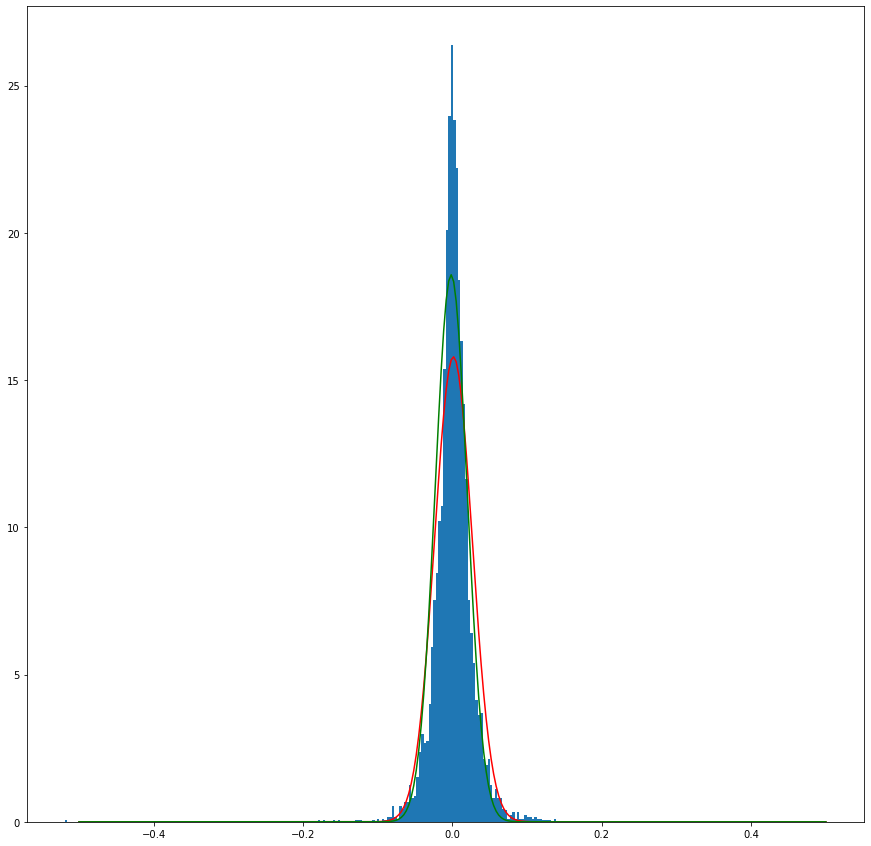

In [117]:
comp_analisys('AAPL')

Mean of daily simple returns: -0.0 
Variance of daily simple returns: 0.021

Value-at-Risk 0.95: -0.031 
Value-at-Risk 0.99: -0.061 
Expected shortfall 0.95: -0.003 
Expected Shortfall 0.99: -0.001

Value-at-Risk normal 0.95: -0.035 
Value-at-Risk normal 0.99: -0.049 
Expected shortfall normal 0.95: -0.002 
Expected shortfall normal 0.99: -0.001

Percentage difference of VAR 0.95: 0.102 
Percentage difference of VAR 0.99: 0.242 
Percentage difference of ES 0.95: 0.136 
Percentage difference of ES 0.99: 0.49


0      -0.030695
1      -0.040000
2      -0.001736
3       0.013370
4       0.038721
          ...   
5530    0.009992
5531    0.006596
5532    0.007187
5533   -0.005352
5534   -0.000950
Name: close, Length: 5535, dtype: float64

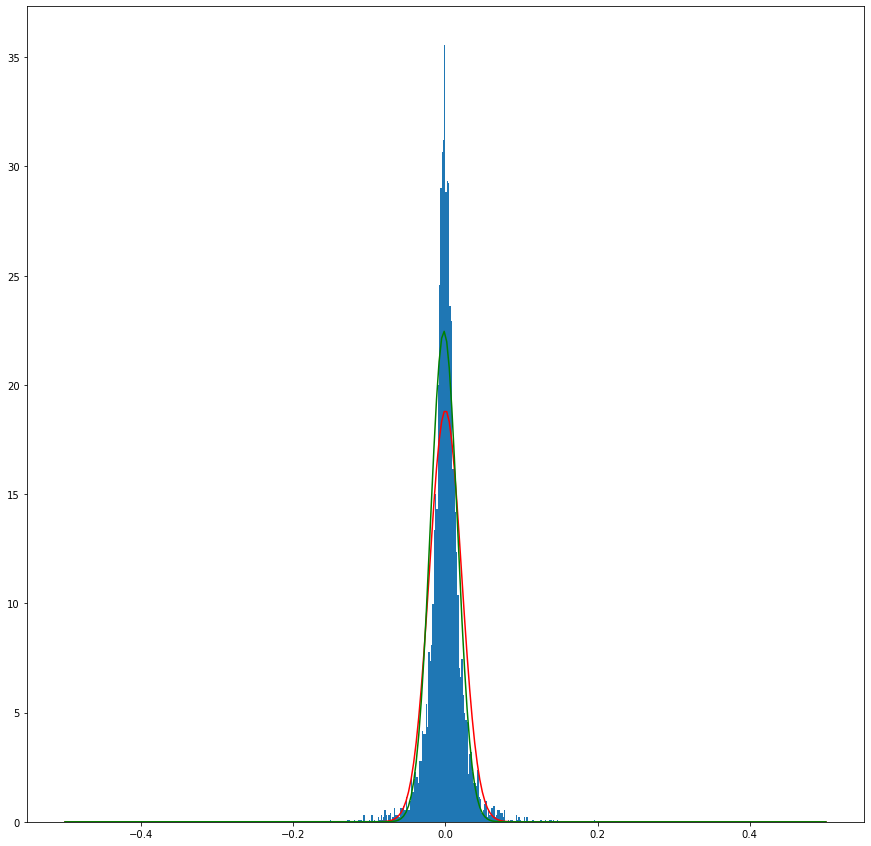

In [118]:
comp_analisys('GE')

Mean of daily simple returns: 0.001 
Variance of daily simple returns: 0.023

Value-at-Risk 0.95: -0.034 
Value-at-Risk 0.99: -0.062 
Expected shortfall 0.95: -0.003 
Expected Shortfall 0.99: -0.001

Value-at-Risk normal 0.95: -0.038 
Value-at-Risk normal 0.99: -0.054 
Expected shortfall normal 0.95: -0.003 
Expected shortfall normal 0.99: -0.001

Percentage difference of VAR 0.95: 0.114 
Percentage difference of VAR 0.99: 0.162 
Percentage difference of ES 0.95: 0.068 
Percentage difference of ES 0.99: 0.237


0      -0.062376
1      -0.062987
2      -0.046828
3       0.042789
4       0.003799
          ...   
5530    0.007088
5531    0.007791
5532   -0.001108
5533   -0.003638
5534   -0.001761
Name: close, Length: 5535, dtype: float64

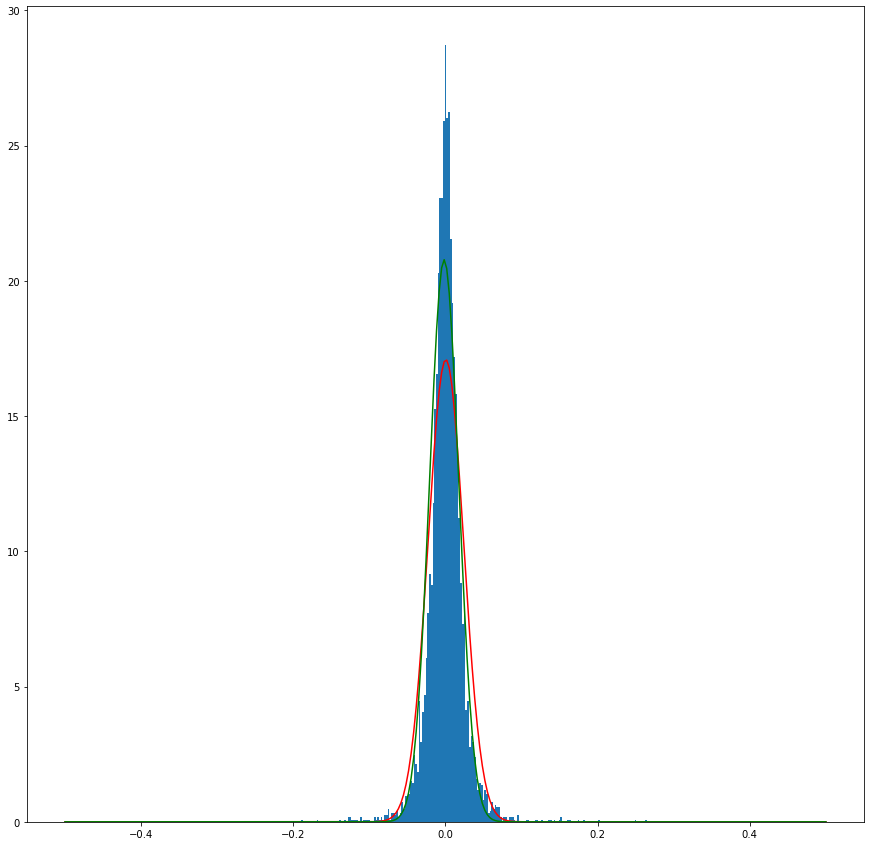

In [119]:
comp_analisys('GS')

Mean of daily simple returns: 0.001 
Variance of daily simple returns: 0.019

Value-at-Risk 0.95: -0.028 
Value-at-Risk 0.99: -0.054 
Expected shortfall 0.95: -0.003 
Expected Shortfall 0.99: -0.001

Value-at-Risk normal 0.95: -0.031 
Value-at-Risk normal 0.99: -0.044 
Expected shortfall normal 0.95: -0.003 
Expected shortfall normal 0.99: -0.001

Percentage difference of VAR 0.95: 0.093 
Percentage difference of VAR 0.99: 0.223 
Percentage difference of ES 0.95: 0.101 
Percentage difference of ES 0.99: 0.237


0      -0.001606
1      -0.033780
2       0.010544
3      -0.033498
4       0.013068
          ...   
5530    0.004472
5531    0.023186
5532   -0.003504
5533    0.002051
5534   -0.007691
Name: close, Length: 5535, dtype: float64

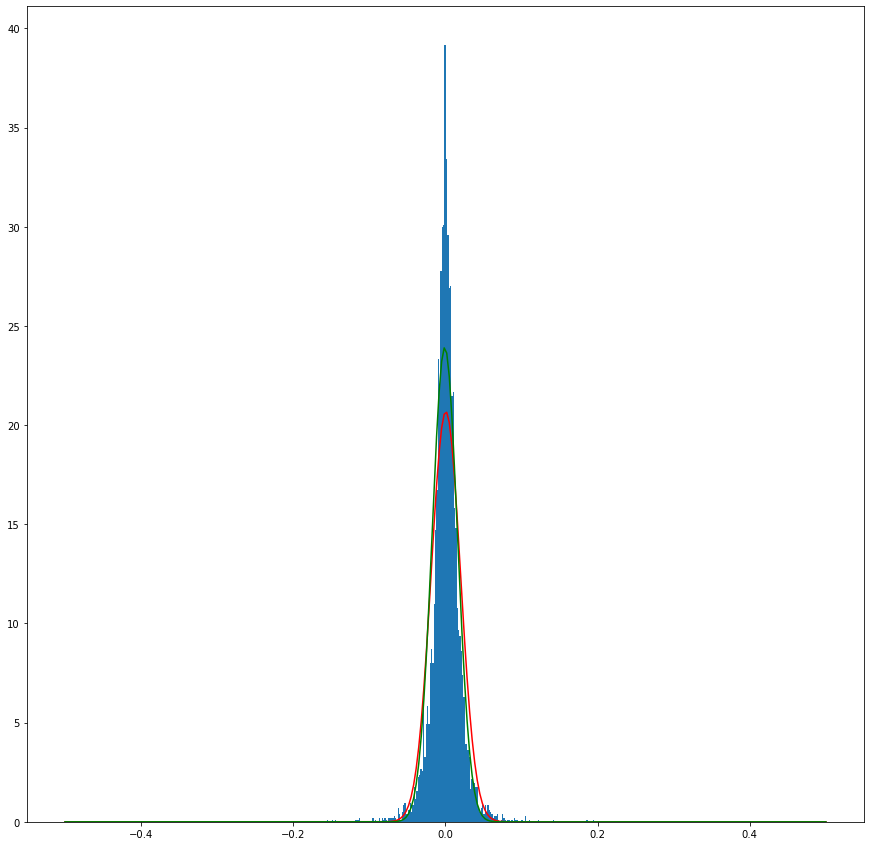

In [120]:
comp_analisys('MSFT')

Mean of daily simple returns: 0.0 
Variance of daily simple returns: 0.013

Value-at-Risk 0.95: -0.018 
Value-at-Risk 0.99: -0.036 
Expected shortfall 0.95: -0.002 
Expected Shortfall 0.99: -0.001

Value-at-Risk normal 0.95: -0.022 
Value-at-Risk normal 0.99: -0.031 
Expected shortfall normal 0.95: -0.002 
Expected shortfall normal 0.99: -0.001

Percentage difference of VAR 0.95: 0.191 
Percentage difference of VAR 0.99: 0.16 
Percentage difference of ES 0.95: 0.109 
Percentage difference of ES 0.99: 0.334


0      -0.021677
1      -0.019242
2      -0.019025
3       0.046061
4       0.079954
          ...   
5530    0.004896
5531    0.011680
5532    0.005371
5533    0.008290
5534   -0.008649
Name: close, Length: 5535, dtype: float64

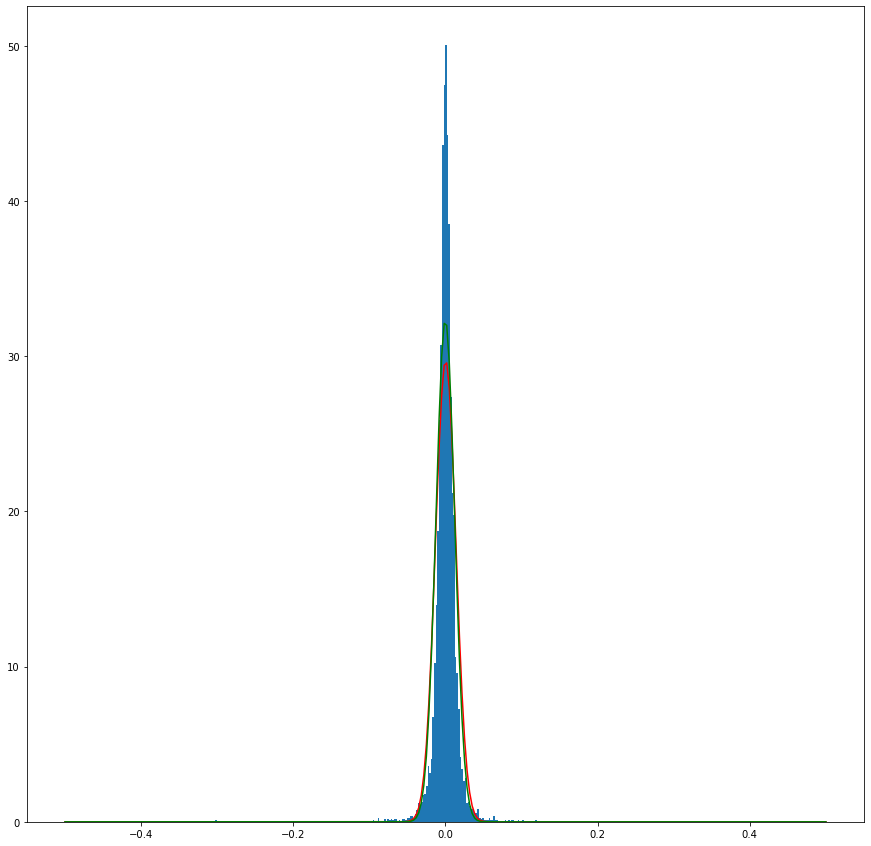

In [121]:
comp_analisys('PG')

## Based on your computations, does the normal distribution seem to describe appropriately the distribution of daily stock returns?

### Относительно, если рассмотреть отношение VaR и ES, то отклонение составляет примерно 10%. Из этого можно сказать что для приближенного рассмотрения нормальное распределение более-менее подходит.

## Compare your results from the task (b) with empirical density function of 5-year and 10-year bond returns

Mean of daily simple returns: 0.001 
Variance of daily simple returns: 0.034

Value-at-Risk 0.95: -0.047 
Value-at-Risk 0.99: -0.082 
Expected shortfall 0.95: -0.004 
Expected Shortfall 0.99: -0.002

Value-at-Risk normal 0.95: -0.056 
Value-at-Risk normal 0.99: -0.079 
Expected shortfall normal 0.95: -0.004 
Expected shortfall normal 0.99: -0.002

Percentage difference of VAR 0.95: 0.151 
Percentage difference of VAR 0.99: 0.04 
Percentage difference of ES 0.95: 0.007 
Percentage difference of ES 0.99: 0.16


2      -0.009447
3       0.014540
4      -0.006010
5      -0.008217
8       0.016876
          ...   
6747   -0.010526
6748    0.017185
6751   -0.005591
6752    0.039357
6753   -0.015456
Name: close, Length: 4361, dtype: float64

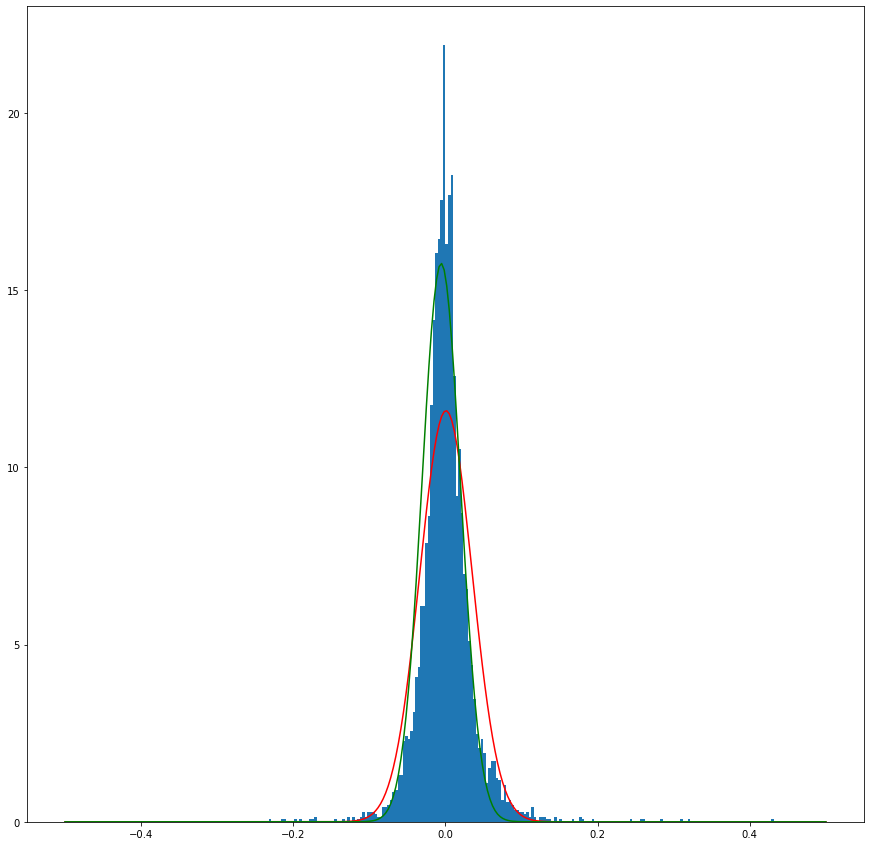

In [74]:
comp_analisys('^FVX')

Mean of daily simple returns: 0.0 
Variance of daily simple returns: 0.025

Value-at-Risk 0.95: -0.032 
Value-at-Risk 0.99: -0.059 
Expected shortfall 0.95: -0.003 
Expected Shortfall 0.99: -0.001

Value-at-Risk normal 0.95: -0.041 
Value-at-Risk normal 0.99: -0.058 
Expected shortfall normal 0.95: -0.003 
Expected shortfall normal 0.99: -0.001

Percentage difference of VAR 0.95: 0.204 
Percentage difference of VAR 0.99: 0.025 
Percentage difference of ES 0.95: 0.045 
Percentage difference of ES 0.99: 0.161


2      -0.009621
3       0.017579
4      -0.007577
5      -0.006871
8       0.016163
          ...   
6747   -0.020175
6748    0.024708
6751    0.000000
6752    0.041864
6753   -0.018146
Name: close, Length: 4361, dtype: float64

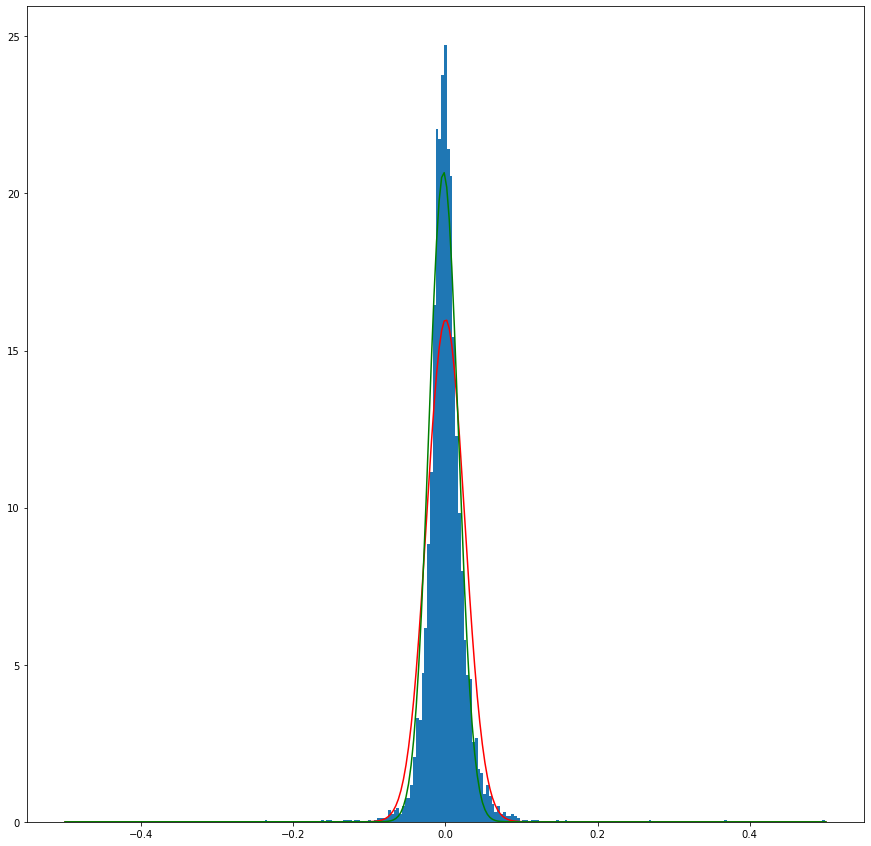

In [75]:
comp_analisys('^TNX')

## 10 летние бонды менее волатильные
## Из гистограмм видно, что они более точно описываются нормальным распределением

## Task 2

In [191]:
yahoo_financials1 = YahooFinancials('AAPL')
data1 = yahoo_financials1.get_historical_price_data(start_date='2010-01-01',
                                                  end_date='2021-12-31',
                                                  time_interval='weekly')
comp_df = pd.DataFrame(data1['AAPL']['prices'])
aapl = cont_comp_returns(comp_df['close']).dropna()

yahoo_financials2 = YahooFinancials('PG')
data2 = yahoo_financials2.get_historical_price_data(start_date='2010-01-01',
                                                  end_date='2021-12-31',
                                                  time_interval='weekly')
comp_df = pd.DataFrame(data2['PG']['prices'])
pg = cont_comp_returns(comp_df['close']).dropna()

yahoo_financials2 = YahooFinancials('TSLA')
data2 = yahoo_financials2.get_historical_price_data(start_date='2010-01-01',
                                                    end_date='2021-12-31',
                                                    time_interval='weekly')
comp_df = pd.DataFrame(data2['TSLA']['prices'])
tsla = cont_comp_returns(comp_df['close']).dropna()

yahoo_financials2 = YahooFinancials('VGT')
data2 = yahoo_financials2.get_historical_price_data(start_date='2010-01-01',
                                                    end_date='2021-12-31',
                                                    time_interval='weekly')
comp_df = pd.DataFrame(data2['VGT']['prices'])
vgt = cont_comp_returns(comp_df['close']).dropna()

yahoo_financials2 = YahooFinancials('BNDX')
data2 = yahoo_financials2.get_historical_price_data(start_date='2010-01-01',
                                                    end_date='2021-12-31',
                                                    time_interval='weekly')
comp_df = pd.DataFrame(data2['BNDX']['prices'])
bndx = cont_comp_returns(comp_df['close']).dropna()

yahoo_financials2 = YahooFinancials('AMZN')
data2 = yahoo_financials2.get_historical_price_data(start_date='2010-01-01',
                                                    end_date='2021-12-31',
                                                    time_interval='weekly')
comp_df = pd.DataFrame(data2['AMZN']['prices'])
amzn = cont_comp_returns(comp_df['close']).dropna()




In [192]:
#a
std_aapl = np.std(aapl)
std_pg = np.std(pg)
exp_aapl = np.mean(aapl)
exp_pg = np.mean(pg)
corr = pearsonr(aapl, pg)
print('AAPL mean:', exp_aapl, 'std:', std_aapl)
print('PG mean:', exp_pg, 'std:', std_pg)
print('Correlation:', corr)

AAPL mean: 0.005740661629421819 std: 0.0363948228983888
PG mean: 0.0018101603552546975 std: 0.02115475779280144
Correlation: (0.2636533110679838, 2.1275973081169904e-11)


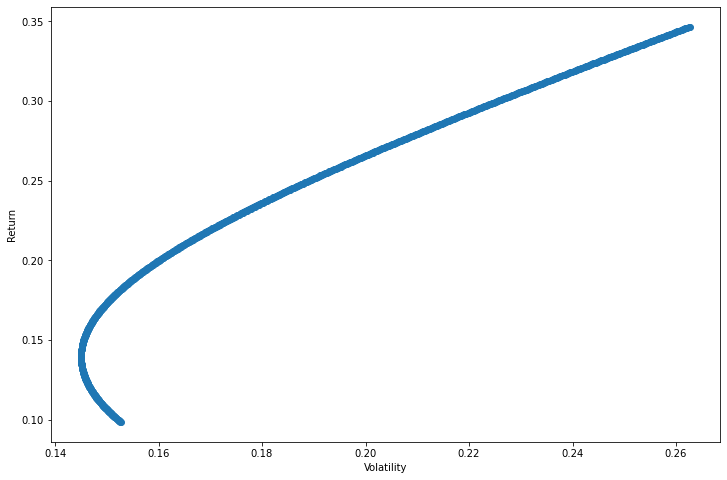

In [195]:
#b

stocks = pd.DataFrame()
stocks['AAPL_ret'] =  aapl
stocks['PG_ret'] = pg


num_ports = 1000
ret_arr = np.zeros(num_ports)
std_arr = np.zeros(num_ports)

weights1 = np.linspace(0,1, num_ports)
weights2 = np.ones(num_ports) - weights1
weights = np.stack((weights1,weights2), axis = 1)

for x in range(num_ports):

    # Expected return
    ret_arr[x] = (1 + np.sum((stocks.mean() * weights[x] )))**52 - 1

    # Expected volatility
    std_arr[x] = np.sqrt(np.dot(weights[x].T, np.dot(stocks.cov(), weights[x]))) * np.sqrt(52)


sharp_r = ret_arr/std_arr
plt.figure(figsize=(12,8))
plt.scatter(std_arr, ret_arr)
plt.xlabel('Volatility')
plt.ylabel('Return')
#plt.scatter(min_std, min_std_ret,c='red', s=50) # red dot
plt.show()

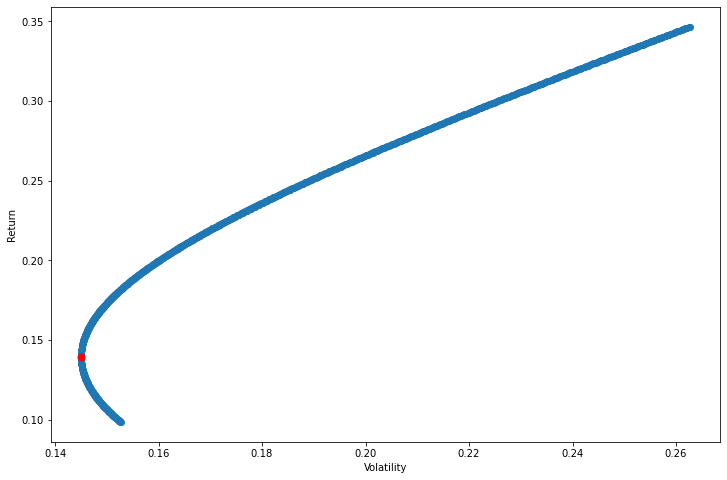

Weights: [0.17917918 0.82082082]
Min std: 0.14501322894134508 Expected return: 0.13949588733789775
Sharpe ratio 0.14501322894134508


In [196]:
#c
min_std = std_arr.min()
min_std_idx = std_arr.argmin()
min_std_ret = ret_arr[min_std_idx]
sharp_ratio = min_std_ret/min_std
min_std_weights = weights[min_std_idx]

plt.figure(figsize=(12,8))
plt.scatter(std_arr, ret_arr)
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(min_std, min_std_ret,c='red', s=50) # red dot
plt.show()


print('Weights:', min_std_weights)
print('Min std:', min_std, 'Expected return:', min_std_ret)
print('Sharpe ratio', min_std )

## Рассмотрим то, как меняется коэффицент Шарпа в зависимости от оптимального значения функции полезности с параметром "а"

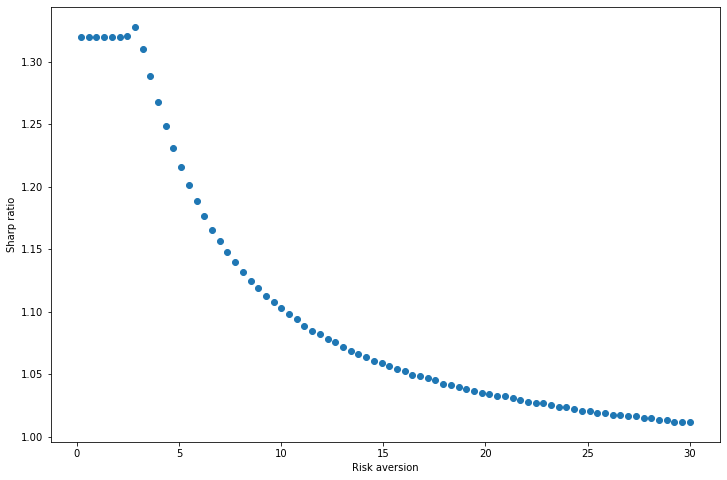

In [197]:

a = np.linspace(0.2, 30,80)
sr = []
for j, param in enumerate(a):
    U = ret_arr - (param/2) * std_arr
    U_max = U.argmax()
    sharp_ratio = ret_arr[U_max]/std_arr[U_max]
    sr.append(sharp_ratio)

plt.figure(figsize=(12,8))
plt.scatter(a, sr)
plt.xlabel('Risk aversion')
plt.ylabel('Sharp ratio')
plt.show()

In [198]:
rs_rate = 0.015
stocks['Risk_free'] = np.ones(stocks.shape[0]) * np.power(1+ rs_rate, 1/52) - 1
stocks

,AAPL_ret,PG_ret,Risk_free
0,-0.005461,0.017515,0.000286
1,-0.006494,-0.028256,0.000286
2,-0.042197,0.030749,0.000286
3,-0.036329,-0.004540,0.000286
4,0.034470,0.009120,0.000286
...,...,...,...
620,0.011239,-0.009418,0.000286
621,0.065950,0.041152,0.000286
622,-0.013176,0.050809,0.000286
623,0.023337,-0.006269,0.000286


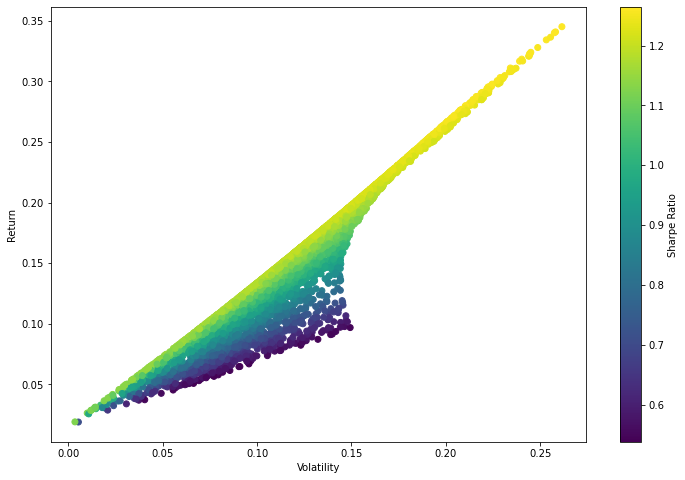

In [199]:
#d
np.random.seed(42)
num_ports = 6000
all_weights = np.zeros((num_ports, len(stocks.columns)))
ret_arr = np.zeros(num_ports)
std_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(3))
    weights = weights/np.sum(weights)

    # Save weights
    all_weights[x,:] = weights

    # Expected return
    ret_arr[x] = (1+np.sum((stocks.mean() * weights)))**52 - 1

    # Expected volatility
    std_arr[x] = np.sqrt(np.dot(weights.T, np.dot(stocks.cov() , weights))) * np.sqrt(52)

sharpe_arr = (ret_arr - rs_rate)/std_arr

plt.figure(figsize=(12,8))
plt.scatter(std_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
#plt.scatter(min_std, min_std_ret,c='red', s=50) # red dot
plt.show()


Weights: [8.68329516e-01 1.31636279e-01 3.42053934e-05]
Min std: 0.23417530303590756 Expected return: 0.31113509664180805
Sharpe ratio 1.264587225051652


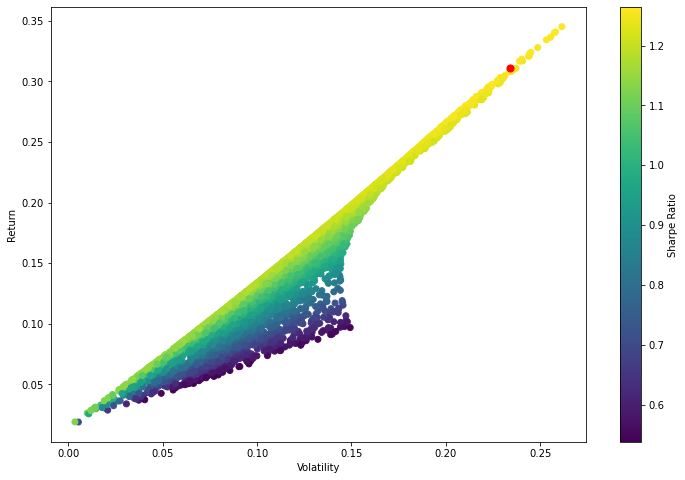

In [200]:
max_sharp_r = sharpe_arr.max()
max_sharp_r_idx = sharpe_arr.argmax()
sr_std = std_arr[max_sharp_r_idx]
sr_ret = ret_arr[max_sharp_r_idx]
sr_weights = all_weights[max_sharp_r_idx]

print('Weights:', sr_weights)
print('Min std:', sr_std, 'Expected return:', sr_ret)
print('Sharpe ratio', max_sharp_r)

plt.figure(figsize=(12,8))
plt.scatter(std_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(sr_std, sr_ret,c='red', s=50) # red dot
plt.show()

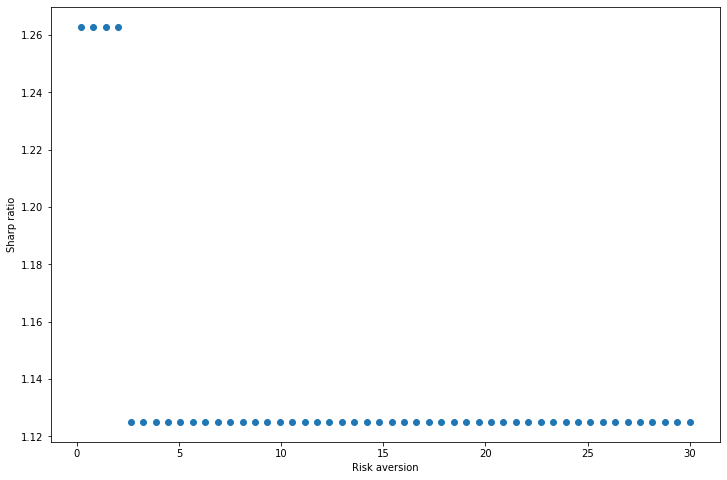

In [201]:
a = np.linspace(0.2, 30,50)
sr = []
for j, param in enumerate(a):
    U = ret_arr - (param/2) * std_arr
    U_max = U.argmax()
    sharp_ratio = (ret_arr[U_max] - rs_rate)/std_arr[U_max]
    sr.append(sharp_ratio)

plt.figure(figsize=(12,8))
plt.scatter(a, sr)
plt.xlabel('Risk aversion')
plt.ylabel('Sharp ratio')
plt.show()

## Чтобы достигнуть нужной доходности (50%), добавим новые активы

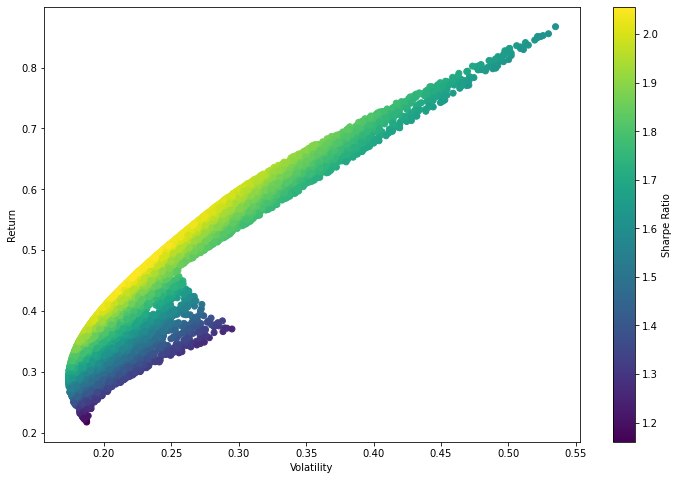

In [202]:
#e
stocks = pd.DataFrame()
#stocks['AAPL_ret'] =  aapl
#stocks['PG_ret'] = pg
stocks['VGT'] = vgt
#stocks['MNST'] = mnst
#stocks['BNDX'] = bndx
stocks['TSLS'] = tsla
stocks['AMZN'] = amzn

np.random.seed(42)
num_ports = 12000
all_weights = np.zeros((num_ports, len(stocks.columns)))
ret_arr = np.zeros(num_ports)
std_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(3))
    weights = weights/np.sum(weights)

    # Save weights
    all_weights[x,:] = weights

    # Expected return
    ret_arr[x] = (1 + np.sum((stocks.mean() * weights )))**52 - 1

    # Expected volatility
    std_arr[x] = np.sqrt(np.dot(weights.T, np.dot(stocks.cov() , weights))) * np.sqrt(52)

sharpe_arr = (ret_arr)/std_arr



plt.figure(figsize=(12,8))
plt.scatter(std_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
#plt.scatter(min_std, min_std_ret,c='red', s=50) # red dot
plt.show()



In [203]:
stocks

,VGT,TSLS,AMZN
0,0.007436,-0.093750,-0.020385
1,-0.021422,0.186207,-0.005732
2,-0.051876,0.031492,-0.004660
3,-0.024835,-0.063410,-0.080060
4,0.026264,-0.017553,0.035794
...,...,...,...
620,-0.017820,NaN,-0.039953
621,0.019021,NaN,0.013400
622,-0.020102,NaN,-0.030430
623,0.029058,NaN,0.013013


# Ищем точку точку с максимальным коэффицентом Шарпа

Weights: [0.31019587 0.32087345 0.36893068]
Min std: 0.22448164122533693 Expected return: 0.4615846188055517
Sharpe ratio 2.0562243588650904


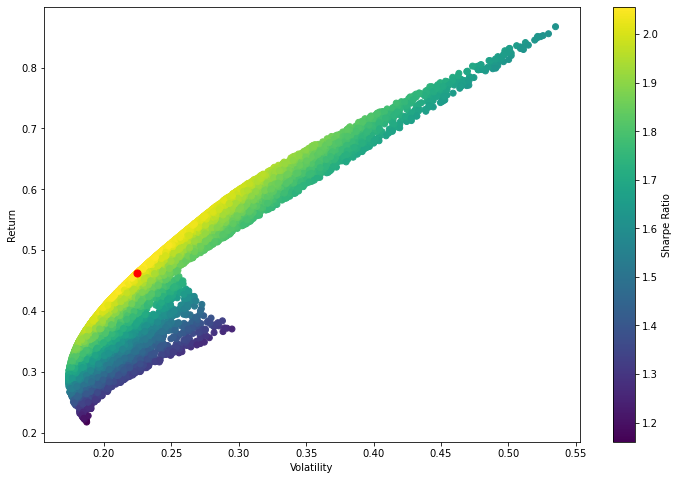

In [204]:
max_sharp_r = sharpe_arr.max()
max_sharp_r_idx = sharpe_arr.argmax()
sr_std = std_arr[max_sharp_r_idx]
sr_ret = ret_arr[max_sharp_r_idx]
sr_weights = all_weights[max_sharp_r_idx]

print('Weights:', sr_weights)
print('Min std:', sr_std, 'Expected return:', sr_ret)
print('Sharpe ratio', max_sharp_r)


plt.figure(figsize=(12,8))
plt.scatter(std_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(sr_std, sr_ret,c='red', s=50) # red dot
plt.show()

# Определяем характеристики нужного портфолио с доходностью 50%

In [206]:
def get_closest(value, arr):
    diff = abs(arr - value)
    return diff.argmin()

necessery_return = 0.5
necessery_return_idx = get_closest(necessery_return, ret_arr)
corresp_std = std_arr[necessery_return_idx]
print('STD of portfolio:',corresp_std,'Expected return:', ret_arr[necessery_return_idx], 'Sharpe ratio:', ret_arr[necessery_return_idx]/corresp_std)
print('Weights:', all_weights[necessery_return_idx])

STD of portfolio: 0.24488288427719931 Expected return: 0.5000096892633275 Sharpe ratio: 2.041831917894813
Weights: [0.25642724 0.38233872 0.36123404]


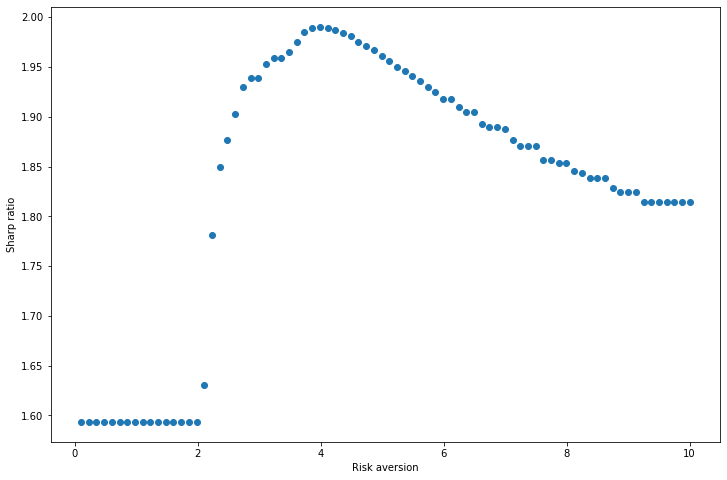

In [207]:
a = np.linspace(0.1, 10,80)
sr = []
for j, param in enumerate(a):
    U = ret_arr - (param/2) * std_arr
    U_max = U.argmax()
    sharp_ratio = (ret_arr[U_max] - rs_rate)/std_arr[U_max]
    sr.append(sharp_ratio)

plt.figure(figsize=(12,8))
plt.scatter(a, sr)
plt.xlabel('Risk aversion')
plt.ylabel('Sharp ratio')
plt.show()

## Судя по графику, можно предположить что risk aversion для этого портфолио равен шести или семи. Не до конца уверен, корректно ли так утверждать